# Cross-correlation

#Test nº 9

**Here we will simulate a two-body model which both prisms have the same dimension and different values for the magnetization direction, but nearest between then and also different from the magnetic field. We will test the correlation for both positive and negative intervals for inclination and also by using the free and corrupted noised total field data.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from codes.prism import prism_tf
from codes.plot import draw_prism

In [2]:
n = 100 # points
x = np.linspace(-2000, 2000, n) # horizontal vectors
y = np.copy(x)
z = -100.
X, Y = np.meshgrid(x, y) # grid

In [16]:
model1 = [-500., -200., -500., -200., 200., 600., 0.962]
model2 = [200., 500., 200., 500., 200., 600., 0.796]
area1 = (model1[:4])
area2 = (model2[:4])

incf, decf = -45., 60. # field
inc1, dec1 = 35., 29. # source n° 1
inc2, dec2 = 39., 33. # source n° 1

In [17]:
tf1 = prism_tf(X, Y, z, model1, incf, decf, inc1, dec1) # total-field anomaly
tf2 = prism_tf(X, Y, z, model2, incf, decf, inc2, dec2) # total-field anomaly

In [18]:
# Total field anomaly due the both prisms
tf = tf1 + tf2

In [19]:
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [20]:
print 'Total field by the first model:'
_ = analysis(tf1, 'nT') # analyzing

Total field by the first model:
Minimum:    -41.2270 nT
Maximum:    5.0707 nT
Mean value: -0.3593 nT
Variation:  46.2977 nT


In [21]:
print 'Total field by the second model:'
_ = analysis(tf2, 'nT') # analyzing

Total field by the second model:
Minimum:    -35.5648 nT
Maximum:    3.4215 nT
Mean value: -0.3236 nT
Variation:  38.9863 nT


In [26]:
print 'Total field anomaly:'
_ = analysis(tf, 'nT') # analyzing

Total field anomaly:
Minimum:    -39.6486 nT
Maximum:    5.3416 nT
Mean value: -0.6829 nT
Variation:  44.9903 nT


In [27]:
# Including noise
tf1_noise = addnoise(tf1, 1.0, 0.1)
tf2_noise = addnoise(tf2, 1.0, 0.1)

In [28]:
# All data
tf_noisy = tf1_noise + tf2_noise

In [29]:
print 'First noised anomaly:'
_ = analysis(tf1_noise, 'nT') # analyzing

First noised anomaly:
Minimum:    -40.2530 nT
Maximum:    6.1203 nT
Mean value: 0.6409 nT
Variation:  46.3733 nT


In [30]:
print 'Second noised anomaly:'
_ = analysis(tf2_noise, 'nT') # analyzing

Second noised anomaly:
Minimum:    -34.5965 nT
Maximum:    4.5094 nT
Mean value: 0.6753 nT
Variation:  39.1059 nT


In [31]:
print 'Noised total field:'
_ = analysis(tf_noisy, 'nT') # analyzing

Noised total field:
Minimum:    -37.8485 nT
Maximum:    7.4790 nT
Mean value: 1.3162 nT
Variation:  45.3275 nT


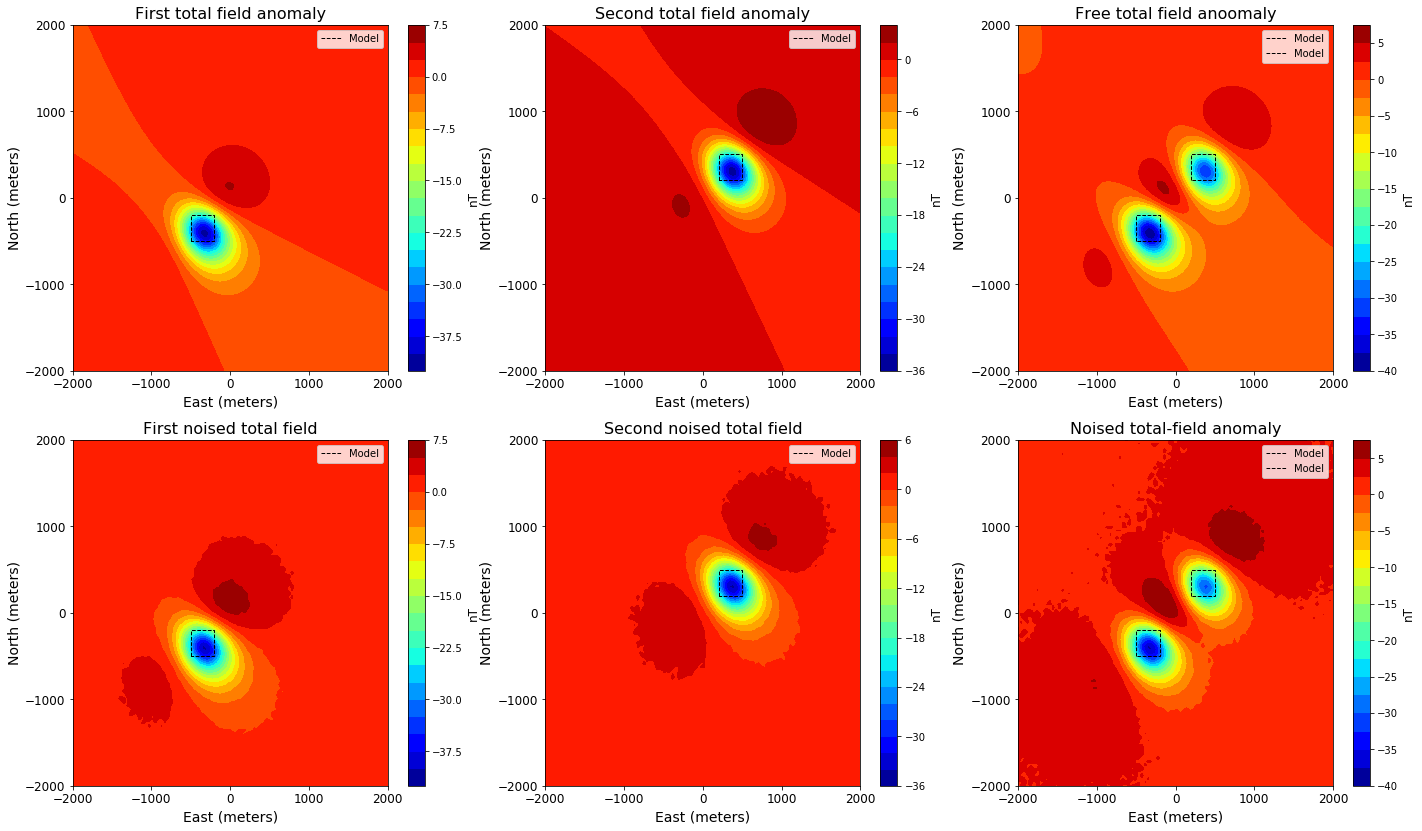

In [32]:
plt.close('all')
plt.figure(figsize=(24, 14))

plt.subplot(2, 3, 1)
plt.contourf(Y, X, tf1, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('First total field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 2)
plt.contourf(Y, X, tf2, 20, cmap = plt.cm.jet)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Second total field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 3)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Free total field anoomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 4)
plt.contourf(Y, X, tf1_noise, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('First noised total field', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 5)
plt.contourf(Y, X, tf2_noise, 20, cmap = plt.cm.jet)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Second noised total field', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 6)
plt.contourf(Y, X, tf_noisy, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Noised total-field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

#plt.savefig('test09-fig01-anomaly.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [33]:
from codes.statistical import cccoef # correlation coefficient

In [34]:
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

(A) Using the freeUsing a free total field anomaly

In [35]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values

Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [36]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [37]:
# Correlation for positive interval
for j in range(nd):
    for i in range(ni):    
        rtp_pos = reduction(x, y, tf, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

codes/auxiliars.py:182: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [38]:
# Correlation for negative interval
for i in range(ni):
    for j in range(nd):
        rtp_neg = reduction(x, y, tf, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)

In [39]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.3125
Maximum:    0.8263
Mean value: 0.6307
Variation:  0.5138

Correlacao (inclinacao negativa)
Minimum:    -0.8263
Maximum:    -0.3125
Mean value: -0.6312
Variation:  0.5138


In [40]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 36.0
Declination: 30.0

Minima correlacao:
Inclination: 10.0
Declination: 109.0


In [41]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: -71.0

Minima correlacao:
Inclination: -36.0
Declination: -150.0


In [43]:
# True values
print 'True 1st pair:', '(', inc1, '/', dec1, ')'
print 'True 2nd pair:', '(', inc2, '/', dec2, ')'

True 1st pair: ( 35.0 / 29.0 )
True 2nd pair: ( 39.0 / 33.0 )


/home/nielsen/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


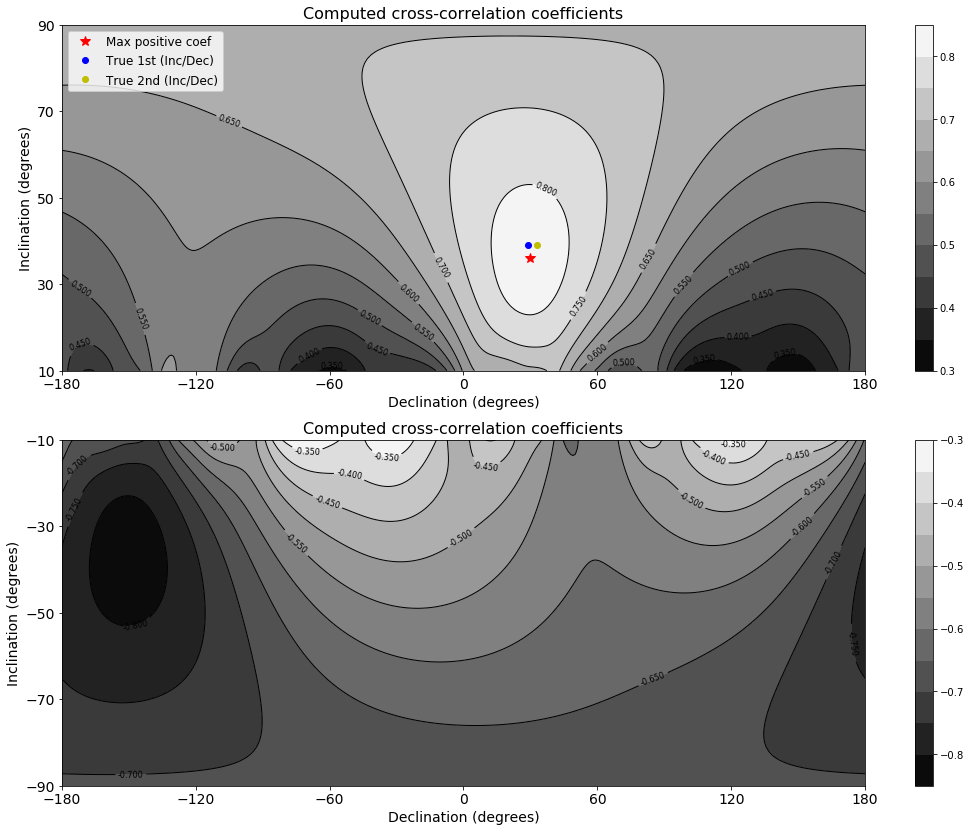

In [46]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.plot(dec1, inc2, 'bo', markersize = 6, label = 'True 1st (Inc/Dec)')
plt.plot(dec2, inc2, 'yo', markersize = 6, label = 'True 2nd (Inc/Dec)')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
#plt.plot(dec1, inc2, 'bo', markersize = 6, label = 'True 1st (Inc/Dec)')
#plt.plot(dec2, inc2, 'yo', markersize = 6, label = 'True 2nd (Inc/Dec)')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.savefig('test09-fig02-1st_correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(B) Using the noised total field anomaly

In [47]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [48]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [49]:
# Correlation for positive interval
for i in range(ni):   
    for j in range(nd):     
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

In [50]:
# Correlation for negative interval
for i in range(ni): 
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)  

In [51]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.3003
Maximum:    0.7534
Mean value: 0.5900
Variation:  0.4530

Correlacao (inclinacao negativa)
Minimum:    -0.7534
Maximum:    -0.3003
Mean value: -0.5904
Variation:  0.4530


In [52]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 39.0
Declination: 28.0

Minima correlacao:
Inclination: 10.0
Declination: 149.0


In [53]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: -31.0

Minima correlacao:
Inclination: -39.0
Declination: -152.0


In [54]:
# True values
print 'True 1st pair:', '(', inc1, '/', dec1, ')'
print 'True 2nd pair:', '(', inc2, '/', dec2, ')'

True 1st pair: ( 35.0 / 29.0 )
True 2nd pair: ( 39.0 / 33.0 )


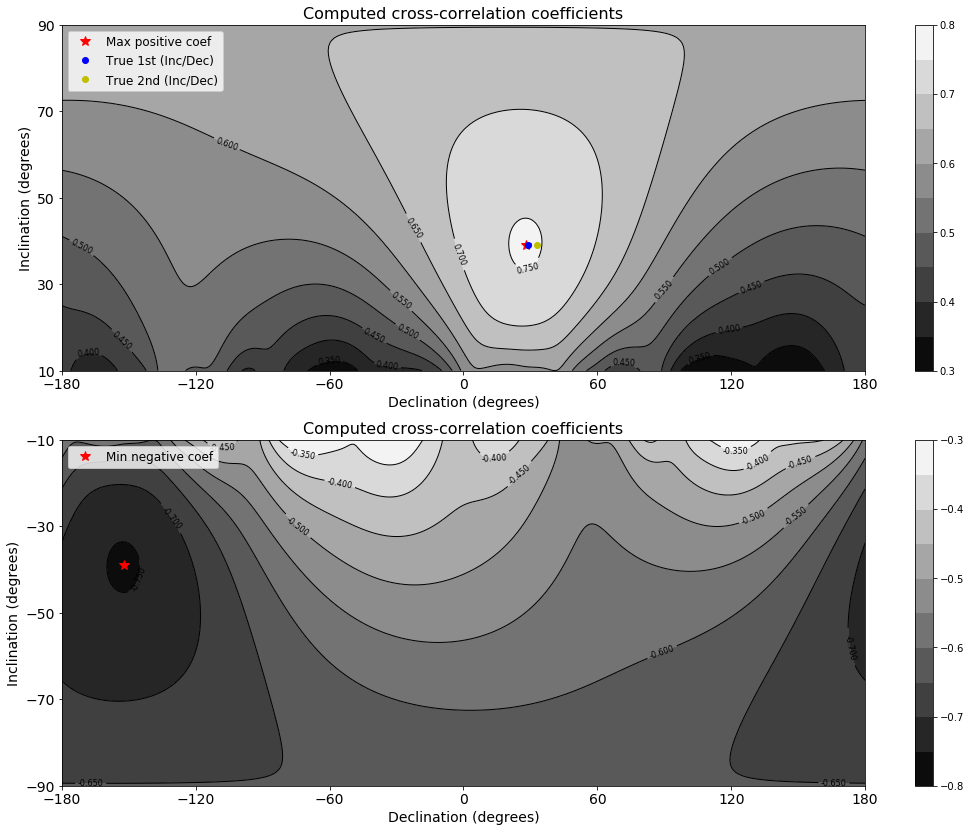

In [56]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.plot(dec1, inc2, 'bo', markersize = 6, label = 'True 1st (Inc/Dec)')
plt.plot(dec2, inc2, 'yo', markersize = 6, label = 'True 2nd (Inc/Dec)')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('test09-fig03-2nd_correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()